In [1]:
# Imporing Modules

import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Imporing Data Files

df_Mobility_Raw = pd.read_csv('Data\Mobility\Global_Mobility_Report.csv')

df_Mobility_Raw.head()

C:\Users\md668815\AppData\Local\Temp\ipykernel_16032\477435152.py:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Mobility_Raw = pd.read_csv('Data\Mobility\Global_Mobility_Report.csv')


country_region_code        country_region sub_region_1 sub_region_2  \
0                  AE  United Arab Emirates          NaN          NaN   
1                  AE  United Arab Emirates          NaN          NaN   
2                  AE  United Arab Emirates          NaN          NaN   
3                  AE  United Arab Emirates          NaN          NaN   
4                  AE  United Arab Emirates          NaN          NaN   

  metro_area iso_3166_2_code  census_fips_code                     place_id  \
0        NaN             NaN               NaN  ChIJvRKrsd9IXj4RpwoIwFYv0zM   
1        NaN             NaN               NaN  ChIJvRKrsd9IXj4RpwoIwFYv0zM   
2        NaN             NaN               NaN  ChIJvRKrsd9IXj4RpwoIwFYv0zM   
3        NaN             NaN               NaN  ChIJvRKrsd9IXj4RpwoIwFYv0zM   
4        NaN             NaN               NaN  ChIJvRKrsd9IXj4RpwoIwFYv0zM   

         date  retail_and_recreation_percent_change_from_baseline  \
0  2020-02-15                                                0.0    
1  2020-02-16                                                1.0    
2  2020-02-17                                               -1.0    
3  2020-02-18                                               -2.0    
4  2020-02-19                                               -2.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                                4.0   
1                                                4.0   
2                                                1.0   
3                                                1.0   
4                                                0.0   

   parks_percent_change_from_baseline  \
0                                 5.0   
1                                 4.0   
2                                 5.0   
3                                 5.0   
4                                 4.0   

   transit_stations_percent_change_from_baseline  \
0                                            0.0   
1                                            1.0   
2                                            1.0   
3                                            0.0   
4                                           -1.0   

   workplaces_percent_change_from_baseline  \
0                                      2.0   
1                                      2.0   
2                                      2.0   
3                                      2.0   
4                                      2.0   

   residential_percent_change_from_baseline  
0                                       1.0  
1                                       1.0  
2                                       1.0  
3                                       1.0  
4                                       1.0

In [3]:
df_Mobility_FL = df_Mobility_Raw.loc[(df_Mobility_Raw['sub_region_1'] == "Florida") & 
                                     (df_Mobility_Raw['country_region_code'] == "US")]
df_Mobility_FL = df_Mobility_FL.drop(['country_region_code', 'country_region', 'census_fips_code', 
                                      'place_id', 'sub_region_1', 'metro_area', 'iso_3166_2_code'], axis=1)
df_Mobility_FL.head()

sub_region_2        date  \
9365125          NaN  2020-02-15   
9365126          NaN  2020-02-16   
9365127          NaN  2020-02-17   
9365128          NaN  2020-02-18   
9365129          NaN  2020-02-19   

         retail_and_recreation_percent_change_from_baseline  \
9365125                                                2.0    
9365126                                                4.0    
9365127                                                5.0    
9365128                                                3.0    
9365129                                                3.0    

         grocery_and_pharmacy_percent_change_from_baseline  \
9365125                                                0.0   
9365126                                                1.0   
9365127                                                1.0   
9365128                                                2.0   
9365129                                                0.0   

         parks_percent_change_from_baseline  \
9365125                                 9.0   
9365126                                 8.0   
9365127                                24.0   
9365128                                13.0   
9365129                                15.0   

         transit_stations_percent_change_from_baseline  \
9365125                                            2.0   
9365126                                            2.0   
9365127                                            0.0   
9365128                                            6.0   
9365129                                            5.0   

         workplaces_percent_change_from_baseline  \
9365125                                     -1.0   
9365126                                     -2.0   
9365127                                    -19.0   
9365128                                      1.0   
9365129                                      2.0   

         residential_percent_change_from_baseline  
9365125                                      -1.0  
9365126                                       0.0  
9365127                                       4.0  
9365128                                       0.0  
9365129                                       0.0

In [4]:
df_Mobility_FL = df_Mobility_FL.rename(columns={'sub_region_2': 'county',
                                                'retail_and_recreation_percent_change_from_baseline': 'retail_and_recreation',
                                                'grocery_and_pharmacy_percent_change_from_baseline': 'grocery_and_pharmacy',
                                               'parks_percent_change_from_baseline': 'parks',
                                               'transit_stations_percent_change_from_baseline': 'transit_stations',
                                               'workplaces_percent_change_from_baseline': 'workplace',
                                               'residential_percent_change_from_baseline': 'residential'})
df_Mobility_FL.head()

county        date  retail_and_recreation  grocery_and_pharmacy  \
9365125    NaN  2020-02-15                    2.0                   0.0   
9365126    NaN  2020-02-16                    4.0                   1.0   
9365127    NaN  2020-02-17                    5.0                   1.0   
9365128    NaN  2020-02-18                    3.0                   2.0   
9365129    NaN  2020-02-19                    3.0                   0.0   

         parks  transit_stations  workplace  residential  
9365125    9.0               2.0       -1.0         -1.0  
9365126    8.0               2.0       -2.0          0.0  
9365127   24.0               0.0      -19.0          4.0  
9365128   13.0               6.0        1.0          0.0  
9365129   15.0               5.0        2.0          0.0

In [5]:
df_Mobility_FL['date'] = pd.to_datetime(df_Mobility_FL['date'])

In [6]:
df_Mobility_FL = df_Mobility_FL.dropna(subset='county').reset_index(drop=True)

In [7]:
df_Mobility_FL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63137 entries, 0 to 63136
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   county                 63137 non-null  object        
 1   date                   63137 non-null  datetime64[ns]
 2   retail_and_recreation  51784 non-null  float64       
 3   grocery_and_pharmacy   51611 non-null  float64       
 4   parks                  44835 non-null  float64       
 5   transit_stations       38661 non-null  float64       
 6   workplace              62486 non-null  float64       
 7   residential            48702 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 3.9+ MB


In [8]:
df_Mobility_FL.fillna(0, inplace=True)
df_Mobility_FL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63137 entries, 0 to 63136
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   county                 63137 non-null  object        
 1   date                   63137 non-null  datetime64[ns]
 2   retail_and_recreation  63137 non-null  float64       
 3   grocery_and_pharmacy   63137 non-null  float64       
 4   parks                  63137 non-null  float64       
 5   transit_stations       63137 non-null  float64       
 6   workplace              63137 non-null  float64       
 7   residential            63137 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 3.9+ MB


In [9]:
# Group the data by year
groups = df_Mobility_FL.groupby(df_Mobility_FL['date'].dt.year)

# Create a list of dataframes, one for each year
df_Mobility_FL_list = [group[1] for group in groups]

# Split the list of dataframes into three separate dataframes, one for each year
df_Mobility_FL_2020, df_Mobility_FL_2021, df_Mobility_FL_2022 = df_Mobility_FL_list[0], df_Mobility_FL_list[1], df_Mobility_FL_list[2]

In [10]:
# Import Infection Data
df_infection_Raw = pd.read_csv(r'Data\Infection\us_counties_2020.csv')

df_infection_Raw.head()

date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1     0.0
1  2020-01-22  Snohomish  Washington  53061.0      1     0.0
2  2020-01-23  Snohomish  Washington  53061.0      1     0.0
3  2020-01-24       Cook    Illinois  17031.0      1     0.0
4  2020-01-24  Snohomish  Washington  53061.0      1     0.0

In [11]:
df_infection_Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884737 entries, 0 to 884736
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    884737 non-null  object 
 1   county  884737 non-null  object 
 2   state   884737 non-null  object 
 3   fips    876471 non-null  float64
 4   cases   884737 non-null  int64  
 5   deaths  865976 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 40.5+ MB


In [12]:
df_infection_FL = df_infection_Raw.loc[df_infection_Raw['state'] == "Florida"]

df_infection_FL.head()

date        county    state     fips  cases  deaths
411  2020-03-01  Hillsborough  Florida  12057.0      1     0.0
412  2020-03-01       Manatee  Florida  12081.0      1     0.0
440  2020-03-02  Hillsborough  Florida  12057.0      1     0.0
441  2020-03-02       Manatee  Florida  12081.0      1     0.0
474  2020-03-03  Hillsborough  Florida  12057.0      2     0.0

In [13]:
df_infection_FL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19498 entries, 411 to 881881
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    19498 non-null  object 
 1   county  19498 non-null  object 
 2   state   19498 non-null  object 
 3   fips    19224 non-null  float64
 4   cases   19498 non-null  int64  
 5   deaths  19498 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.0+ MB


In [14]:
df_infection_FL = df_infection_FL.drop(['fips'], axis=1)

df_infection_FL.head()

date        county    state  cases  deaths
411  2020-03-01  Hillsborough  Florida      1     0.0
412  2020-03-01       Manatee  Florida      1     0.0
440  2020-03-02  Hillsborough  Florida      1     0.0
441  2020-03-02       Manatee  Florida      1     0.0
474  2020-03-03  Hillsborough  Florida      2     0.0

In [15]:
df_infection_FL['county'] = df_infection_FL['county'] + " County"

df_infection_FL.head()

date               county    state  cases  deaths
411  2020-03-01  Hillsborough County  Florida      1     0.0
412  2020-03-01       Manatee County  Florida      1     0.0
440  2020-03-02  Hillsborough County  Florida      1     0.0
441  2020-03-02       Manatee County  Florida      1     0.0
474  2020-03-03  Hillsborough County  Florida      2     0.0

In [16]:
df_infection_FL = df_infection_FL.drop(['state'], axis=1).reset_index(drop=True)
df_infection_FL.head()

date               county  cases  deaths
0  2020-03-01  Hillsborough County      1     0.0
1  2020-03-01       Manatee County      1     0.0
2  2020-03-02  Hillsborough County      1     0.0
3  2020-03-02       Manatee County      1     0.0
4  2020-03-03  Hillsborough County      2     0.0

In [17]:
df_infection_FL['date'] = pd.to_datetime(df_infection_FL['date'])

In [18]:
df_infection_FL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19498 entries, 0 to 19497
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    19498 non-null  datetime64[ns]
 1   county  19498 non-null  object        
 2   cases   19498 non-null  int64         
 3   deaths  19498 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 609.4+ KB


In [19]:
# Merge the two dataframes based on the 'Country' and 'Date' columns
merged_df = pd.merge(df_Mobility_FL_2020, df_infection_FL, on=['county', 'date'])

merged_df.head()

county       date  retail_and_recreation  grocery_and_pharmacy  \
0  Alachua County 2020-03-10                    5.0                   4.0   
1  Alachua County 2020-03-11                    6.0                   9.0   
2  Alachua County 2020-03-12                    5.0                  13.0   
3  Alachua County 2020-03-13                    3.0                  16.0   
4  Alachua County 2020-03-14                   -8.0                  14.0   

   parks  transit_stations  workplace  residential  cases  deaths  
0   12.0               3.0        0.0          0.0      1     0.0  
1   15.0              -3.0       -1.0          0.0      1     0.0  
2   21.0               0.0       -1.0          1.0      2     0.0  
3   13.0              -3.0       -4.0          2.0      3     0.0  
4  -11.0              -3.0       -3.0          2.0      3     0.0

In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18366 entries, 0 to 18365
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   county                 18366 non-null  object        
 1   date                   18366 non-null  datetime64[ns]
 2   retail_and_recreation  18366 non-null  float64       
 3   grocery_and_pharmacy   18366 non-null  float64       
 4   parks                  18366 non-null  float64       
 5   transit_stations       18366 non-null  float64       
 6   workplace              18366 non-null  float64       
 7   residential            18366 non-null  float64       
 8   cases                  18366 non-null  int64         
 9   deaths                 18366 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 1.5+ MB


In [21]:
merged_df['total_mobility'] = merged_df['retail_and_recreation'] + merged_df['grocery_and_pharmacy'] + merged_df['parks'] + merged_df['transit_stations'] + merged_df['workplace'] + merged_df['residential']
merged_df.head()

county       date  retail_and_recreation  grocery_and_pharmacy  \
0  Alachua County 2020-03-10                    5.0                   4.0   
1  Alachua County 2020-03-11                    6.0                   9.0   
2  Alachua County 2020-03-12                    5.0                  13.0   
3  Alachua County 2020-03-13                    3.0                  16.0   
4  Alachua County 2020-03-14                   -8.0                  14.0   

   parks  transit_stations  workplace  residential  cases  deaths  \
0   12.0               3.0        0.0          0.0      1     0.0   
1   15.0              -3.0       -1.0          0.0      1     0.0   
2   21.0               0.0       -1.0          1.0      2     0.0   
3   13.0              -3.0       -4.0          2.0      3     0.0   
4  -11.0              -3.0       -3.0          2.0      3     0.0   

   total_mobility  
0            24.0  
1            26.0  
2            39.0  
3            27.0  
4            -9.0

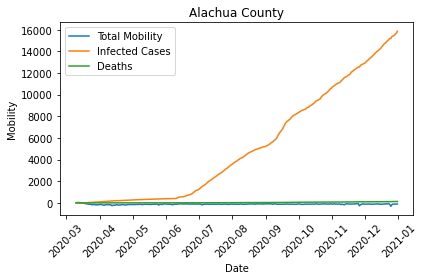

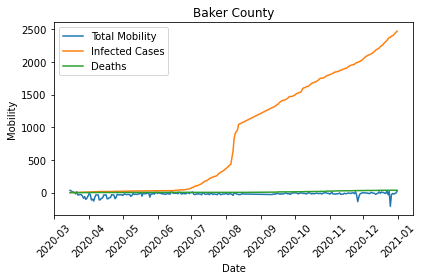

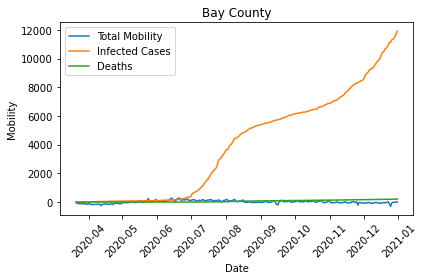

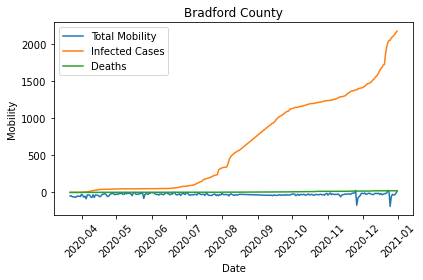

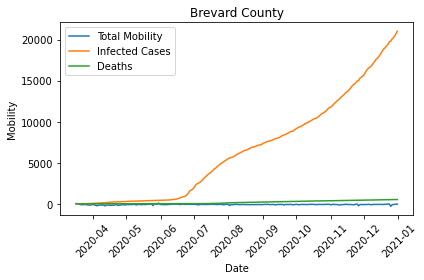

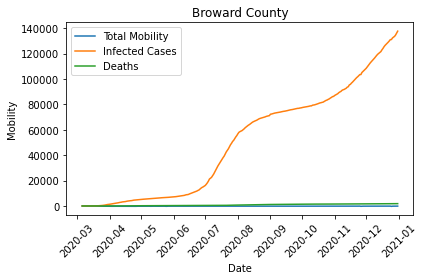

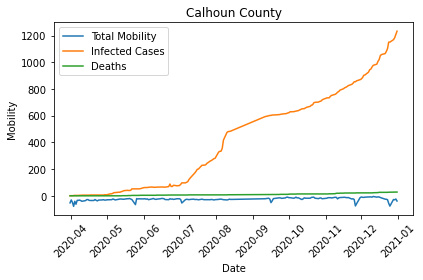

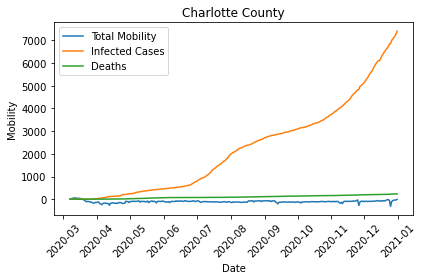

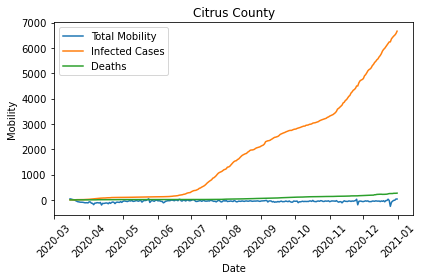

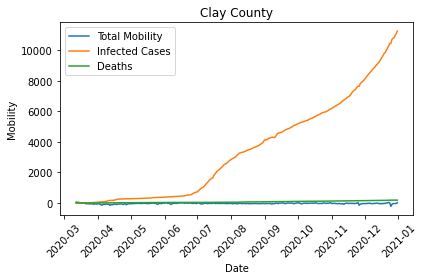

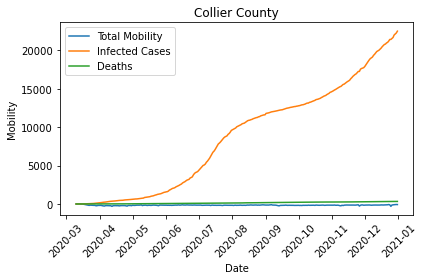

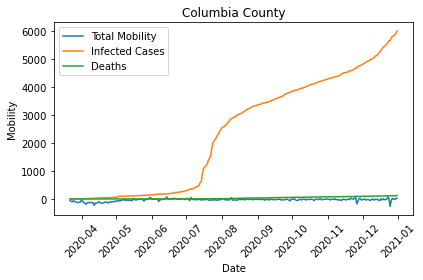

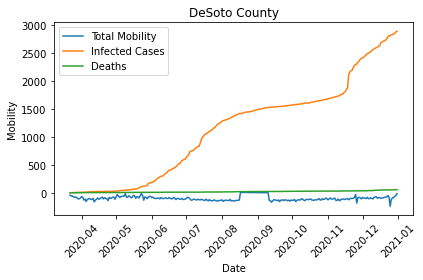

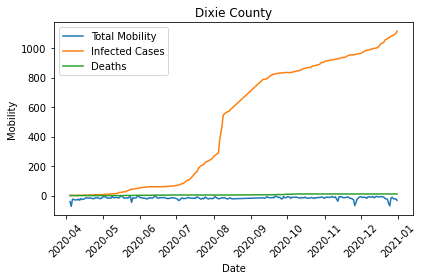

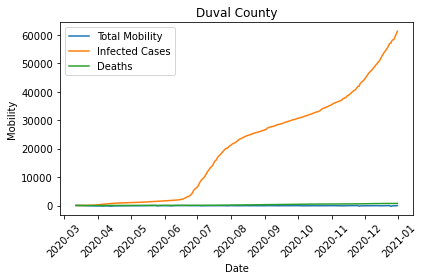

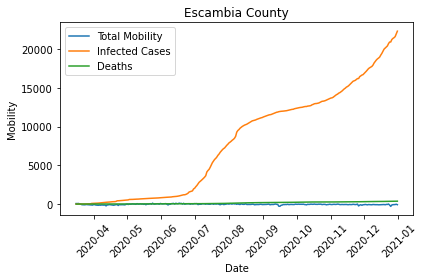

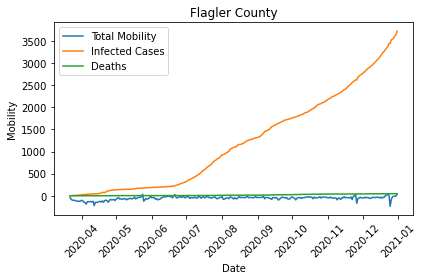

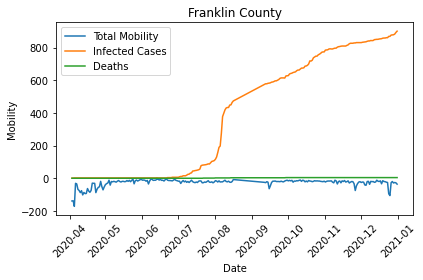

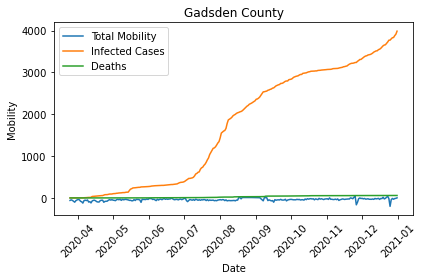

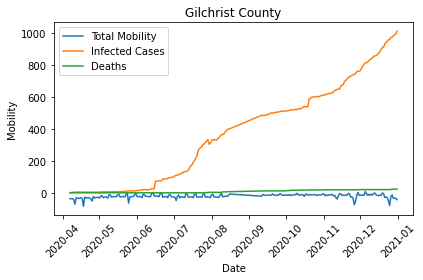

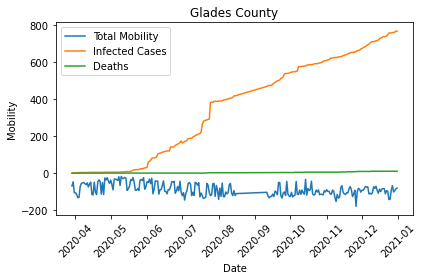

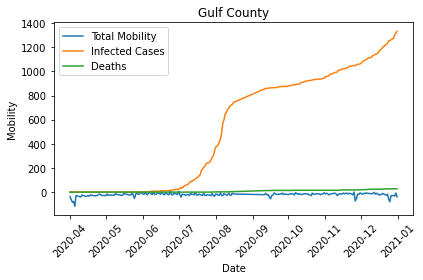

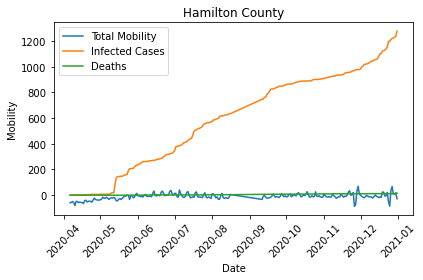

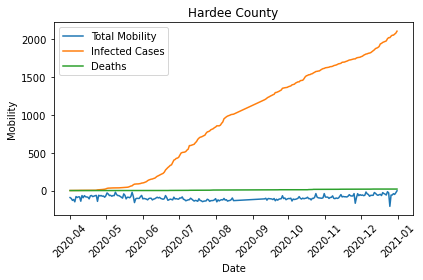

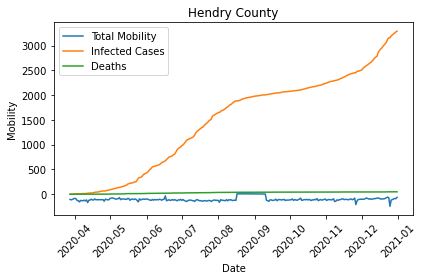

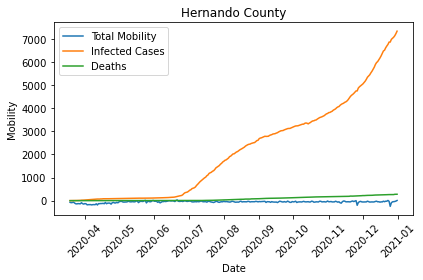

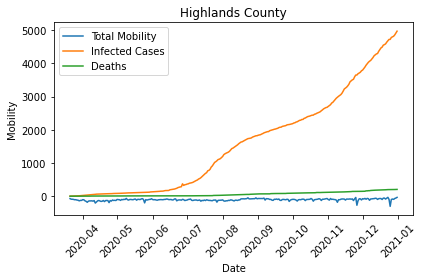

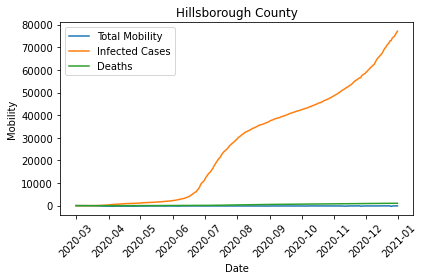

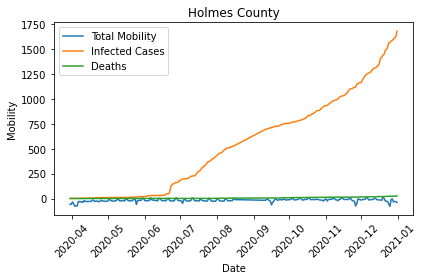

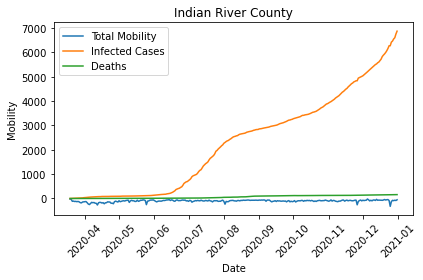

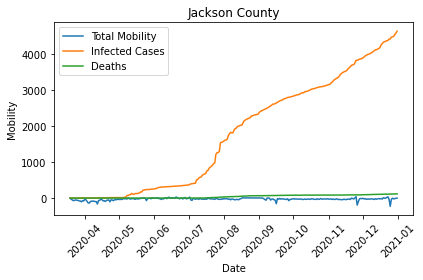

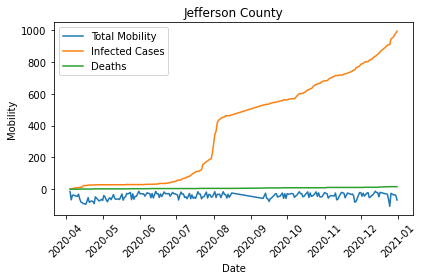

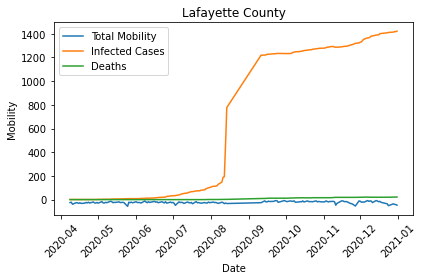

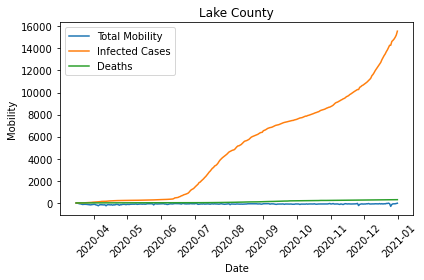

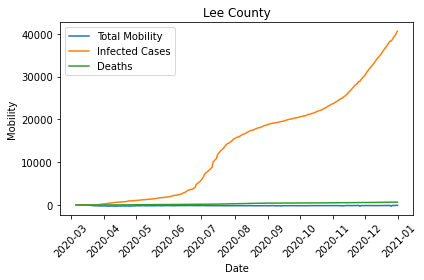

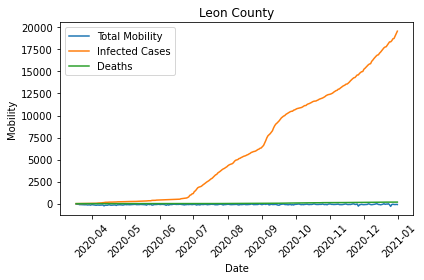

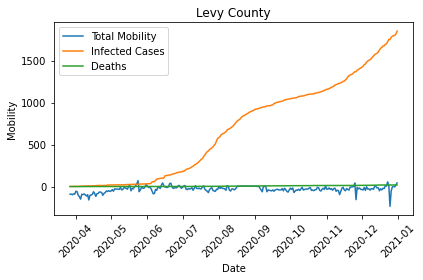

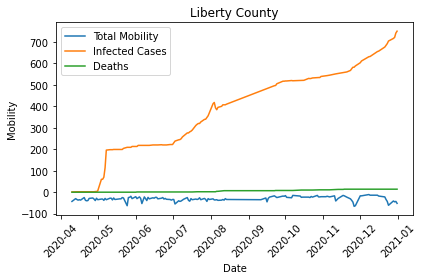

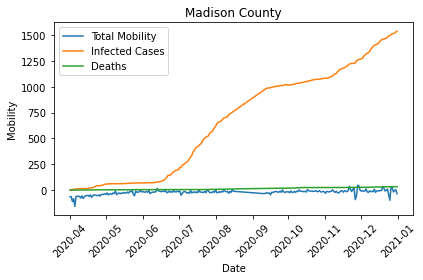

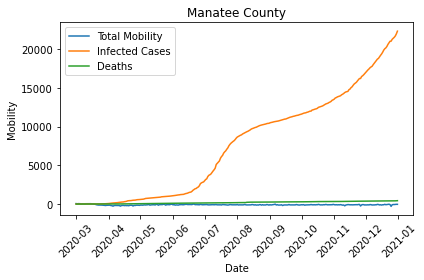

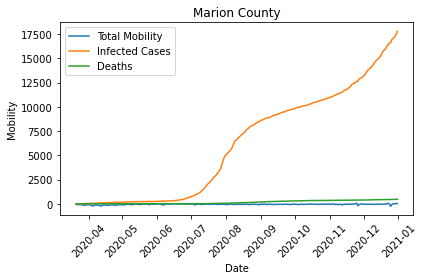

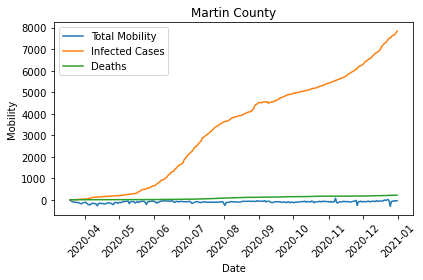

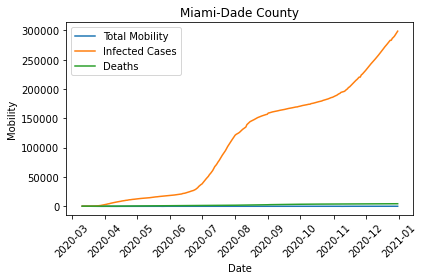

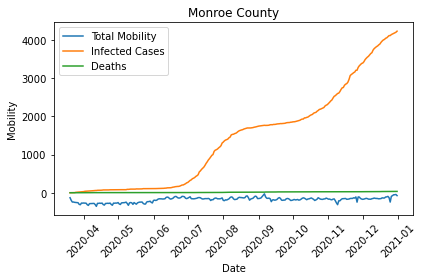

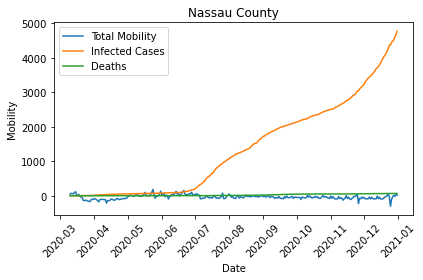

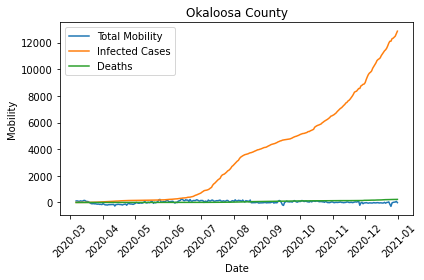

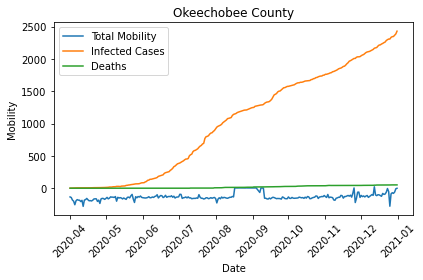

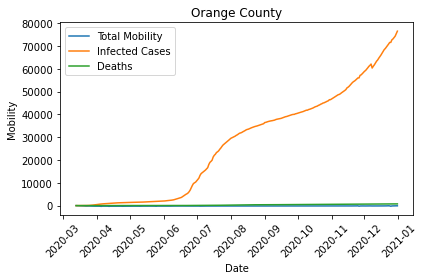

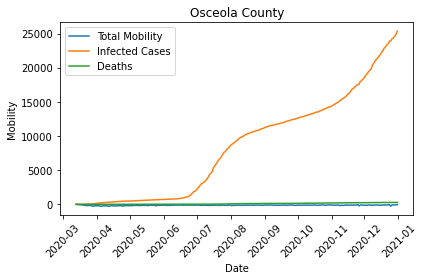

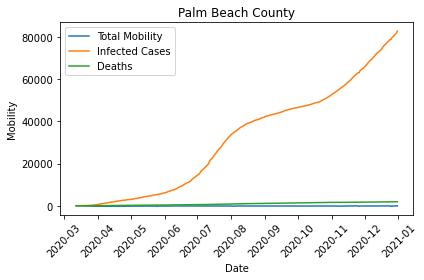

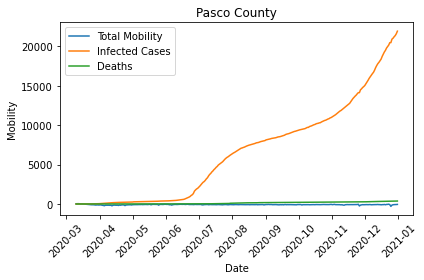

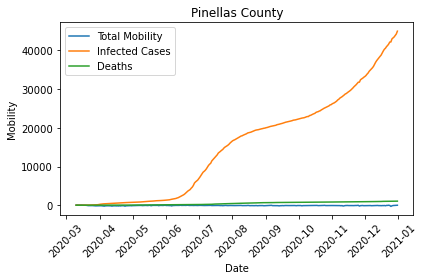

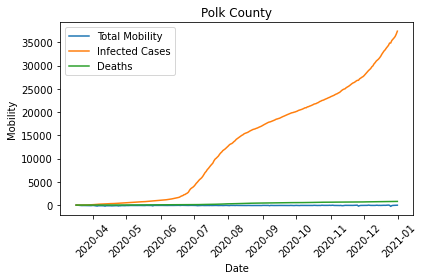

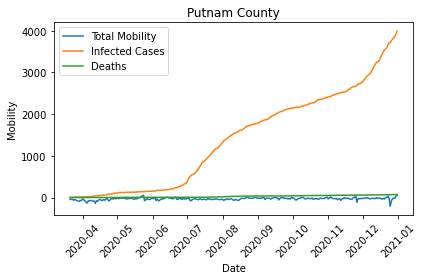

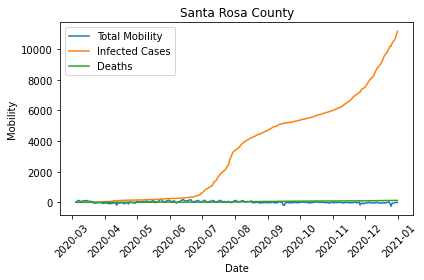

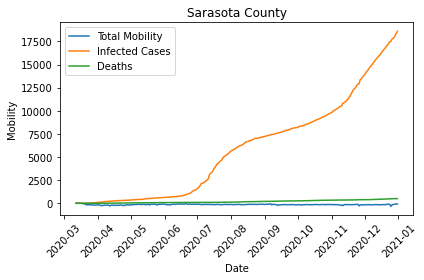

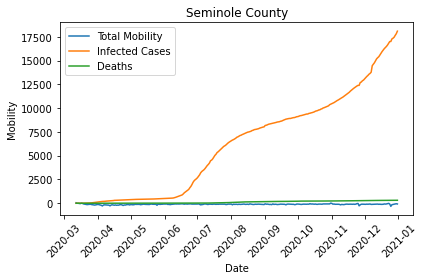

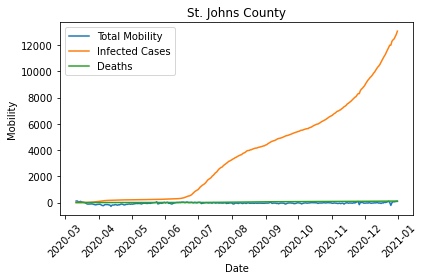

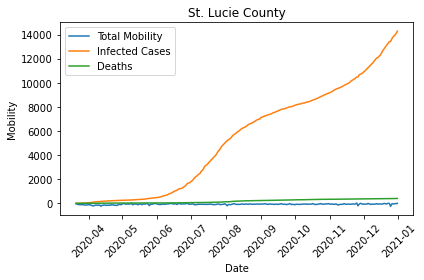

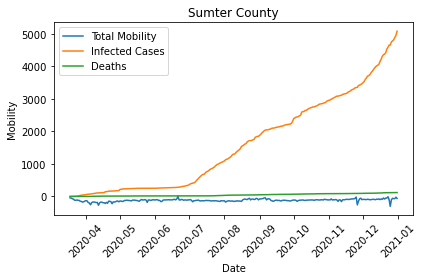

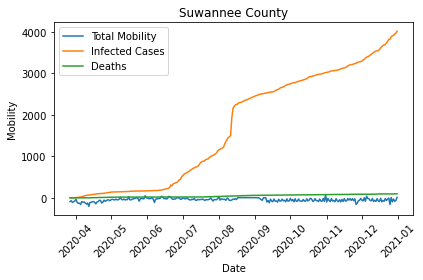

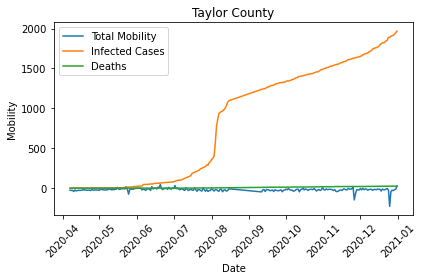

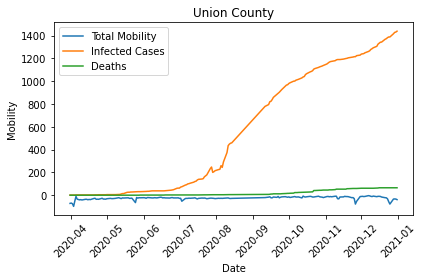

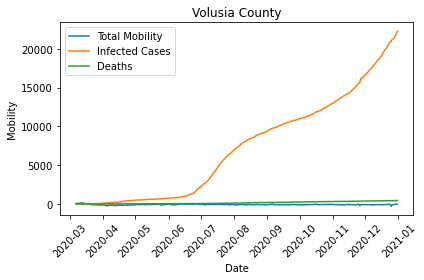

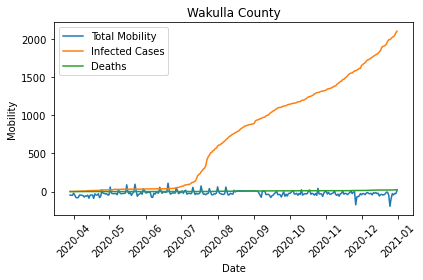

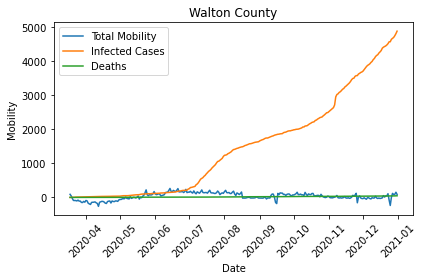

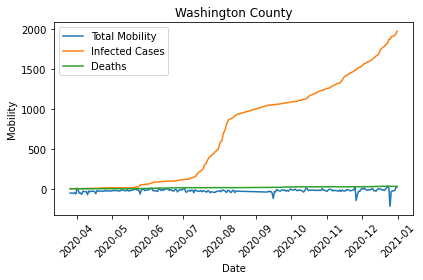

In [22]:
# group the data by county
grouped = merged_df.groupby('county')

for name, group in grouped:
    plt.plot(group['date'], group['total_mobility'], label='Total Mobility')
    plt.plot(group['date'], group['cases'], label='Infected Cases')
    plt.plot(group['date'], group['deaths'], label='Deaths')
    plt.title(name)
    plt.legend()
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Mobility')
    plt.tight_layout()
    filename = os.path.join('Figure/2020/Number_of_Infection', name + '.jpeg')
    plt.savefig(filename, dpi=400)
    plt.show()

In [23]:
# Import Population Data
df_pop_raw = pd.read_csv('Data\Population\co-est2021-alldata.csv', encoding='latin-1')

df_pop_raw.head()

SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME         CTYNAME  \
0      40       3         6      1       0  Alabama         Alabama   
1      50       3         6      1       1  Alabama  Autauga County   
2      50       3         6      1       3  Alabama  Baldwin County   
3      50       3         6      1       5  Alabama  Barbour County   
4      50       3         6      1       7  Alabama     Bibb County   

   ESTIMATESBASE2020  POPESTIMATE2020  POPESTIMATE2021  ...  RESIDUAL2021  \
0            5024279          5024803          5039877  ...           242   
1              58805            58877            59095  ...             8   
2             231767           233140           239294  ...           -82   
3              25223            25180            24964  ...             1   
4              22293            22223            22477  ...            -1   

   GQESTIMATESBASE2020  GQESTIMATES2020  GQESTIMATES2021  RBIRTH2021  \
0               114572           114572           114572   11.191613   
1                  442              442              442   11.002611   
2                 2177             2177             2177    9.567474   
3                 2789             2789             2789   10.928526   
4                 2062             2062             2062   10.111857   

   RDEATH2021  RNATURALCHG2021  RINTERNATIONALMIG2021  RDOMESTICMIG2021  \
0   12.890226        -1.698613               0.247201          4.398749   
1   11.545112        -0.542502               0.084766          4.017903   
2   12.137145        -2.569671               0.266704         28.702422   
3   15.714742        -4.786216               0.039885         -3.908743   
4   12.617450        -2.505593               0.089485         13.825503   

   RNETMIG2021  
0     4.645950  
1     4.102668  
2    28.969126  
3    -3.868858  
4    13.914989  

[5 rows x 35 columns]

In [24]:
df_pop_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SUMLEV                 3194 non-null   int64  
 1   REGION                 3194 non-null   int64  
 2   DIVISION               3194 non-null   int64  
 3   STATE                  3194 non-null   int64  
 4   COUNTY                 3194 non-null   int64  
 5   STNAME                 3194 non-null   object 
 6   CTYNAME                3194 non-null   object 
 7   ESTIMATESBASE2020      3194 non-null   int64  
 8   POPESTIMATE2020        3194 non-null   int64  
 9   POPESTIMATE2021        3194 non-null   int64  
 10  NPOPCHG2020            3194 non-null   int64  
 11  NPOPCHG2021            3194 non-null   int64  
 12  BIRTHS2020             3194 non-null   int64  
 13  BIRTHS2021             3194 non-null   int64  
 14  DEATHS2020             3194 non-null   int64  
 15  DEAT

In [25]:
df_pop_FL = df_pop_raw.loc[df_pop_raw['STNAME'] == "Florida"]

df_pop_FL.head()

SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME          CTYNAME  \
330      40       3         5     12       0  Florida          Florida   
331      50       3         5     12       1  Florida   Alachua County   
332      50       3         5     12       3  Florida     Baker County   
333      50       3         5     12       5  Florida       Bay County   
334      50       3         5     12       7  Florida  Bradford County   

     ESTIMATESBASE2020  POPESTIMATE2020  POPESTIMATE2021  ...  RESIDUAL2021  \
330           21538187         21569932         21781128  ...         -3036   
331             278468           278684           279238  ...            69   
332              28259            28309            28715  ...             0   
333             175216           174461           179168  ...           -68   
334              28303            28364            28540  ...             0   

     GQESTIMATESBASE2020  GQESTIMATES2020  GQESTIMATES2021  RBIRTH2021  \
330               412459           412459           412459    9.702416   
331                14882            14882            14882    9.223512   
332                 2531             2531             2531   12.275533   
333                 3540             3540             3540   10.790970   
334                 4127             4127             4127    9.876283   

     RDEATH2021  RNATURALCHG2021  RINTERNATIONALMIG2021  RDOMESTICMIG2021  \
330   11.789931        -2.087515               1.780349         10.190754   
331    9.040690         0.182821               1.319181          0.236592   
332   10.872615         1.402918               0.070146         12.766554   
333   12.657333        -1.866363               0.588187         28.283879   
334   12.969211        -3.092928               0.105441          9.173345   

     RNETMIG2021  
330    11.971103  
331     1.555773  
332    12.836700  
333    28.872066  
334     9.278785  

[5 rows x 35 columns]

In [26]:
df_pop_FL = df_pop_FL[['STNAME', 'CTYNAME', 'POPESTIMATE2020']]
df_pop_FL.head()

STNAME          CTYNAME  POPESTIMATE2020
330  Florida          Florida         21569932
331  Florida   Alachua County           278684
332  Florida     Baker County            28309
333  Florida       Bay County           174461
334  Florida  Bradford County            28364

In [27]:
df_pop_FL = df_pop_FL[df_pop_FL.CTYNAME != 'Florida']
df_pop_FL.head()

STNAME          CTYNAME  POPESTIMATE2020
331  Florida   Alachua County           278684
332  Florida     Baker County            28309
333  Florida       Bay County           174461
334  Florida  Bradford County            28364
335  Florida   Brevard County           608007

In [28]:
df_pop_FL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 331 to 397
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STNAME           67 non-null     object
 1   CTYNAME          67 non-null     object
 2   POPESTIMATE2020  67 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ KB


In [29]:
df_pop_FL.reset_index(drop=True)

STNAME            CTYNAME  POPESTIMATE2020
0   Florida     Alachua County           278684
1   Florida       Baker County            28309
2   Florida         Bay County           174461
3   Florida    Bradford County            28364
4   Florida     Brevard County           608007
..      ...                ...              ...
62  Florida       Union County            16126
63  Florida     Volusia County           554901
64  Florida     Wakulla County            33907
65  Florida      Walton County            75855
66  Florida  Washington County            25357

[67 rows x 3 columns]

In [30]:
df_pop_FL = df_pop_FL.rename(columns={'STNAME': 'state', 'CTYNAME': 'county', 'POPESTIMATE2020': 'pop_2020'})
df_pop_FL.head()

state           county  pop_2020
331  Florida   Alachua County    278684
332  Florida     Baker County     28309
333  Florida       Bay County    174461
334  Florida  Bradford County     28364
335  Florida   Brevard County    608007

In [31]:
df_pop_FL = df_pop_FL.reset_index(drop=True)
df_pop_FL.head()

state           county  pop_2020
0  Florida   Alachua County    278684
1  Florida     Baker County     28309
2  Florida       Bay County    174461
3  Florida  Bradford County     28364
4  Florida   Brevard County    608007

In [32]:
df_pop_FL = df_pop_FL[['county', 'pop_2020']]
df_pop_FL.head()

county  pop_2020
0   Alachua County    278684
1     Baker County     28309
2       Bay County    174461
3  Bradford County     28364
4   Brevard County    608007

In [33]:
df_mob_inf_fl_2020 = pd.merge(merged_df, df_pop_FL, on='county')
df_mob_inf_fl_2020.head()

county       date  retail_and_recreation  grocery_and_pharmacy  \
0  Alachua County 2020-03-10                    5.0                   4.0   
1  Alachua County 2020-03-11                    6.0                   9.0   
2  Alachua County 2020-03-12                    5.0                  13.0   
3  Alachua County 2020-03-13                    3.0                  16.0   
4  Alachua County 2020-03-14                   -8.0                  14.0   

   parks  transit_stations  workplace  residential  cases  deaths  \
0   12.0               3.0        0.0          0.0      1     0.0   
1   15.0              -3.0       -1.0          0.0      1     0.0   
2   21.0               0.0       -1.0          1.0      2     0.0   
3   13.0              -3.0       -4.0          2.0      3     0.0   
4  -11.0              -3.0       -3.0          2.0      3     0.0   

   total_mobility  pop_2020  
0            24.0    278684  
1            26.0    278684  
2            39.0    278684  
3            27.0    278684  
4            -9.0    278684

In [34]:
df_mob_inf_fl_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18366 entries, 0 to 18365
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   county                 18366 non-null  object        
 1   date                   18366 non-null  datetime64[ns]
 2   retail_and_recreation  18366 non-null  float64       
 3   grocery_and_pharmacy   18366 non-null  float64       
 4   parks                  18366 non-null  float64       
 5   transit_stations       18366 non-null  float64       
 6   workplace              18366 non-null  float64       
 7   residential            18366 non-null  float64       
 8   cases                  18366 non-null  int64         
 9   deaths                 18366 non-null  float64       
 10  total_mobility         18366 non-null  float64       
 11  pop_2020               18366 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory

In [35]:
df_mob_inf_fl_2020['cases_percent'] = (df_mob_inf_fl_2020['cases'] / df_mob_inf_fl_2020['pop_2020'])*100
df_mob_inf_fl_2020.head()

county       date  retail_and_recreation  grocery_and_pharmacy  \
0  Alachua County 2020-03-10                    5.0                   4.0   
1  Alachua County 2020-03-11                    6.0                   9.0   
2  Alachua County 2020-03-12                    5.0                  13.0   
3  Alachua County 2020-03-13                    3.0                  16.0   
4  Alachua County 2020-03-14                   -8.0                  14.0   

   parks  transit_stations  workplace  residential  cases  deaths  \
0   12.0               3.0        0.0          0.0      1     0.0   
1   15.0              -3.0       -1.0          0.0      1     0.0   
2   21.0               0.0       -1.0          1.0      2     0.0   
3   13.0              -3.0       -4.0          2.0      3     0.0   
4  -11.0              -3.0       -3.0          2.0      3     0.0   

   total_mobility  pop_2020  cases_percent  
0            24.0    278684       0.000359  
1            26.0    278684       0.000359  
2            39.0    278684       0.000718  
3            27.0    278684       0.001076  
4            -9.0    278684       0.001076

In [36]:
df_mob_inf_fl_2020['total_mobility'] = df_mob_inf_fl_2020['total_mobility'] / 6

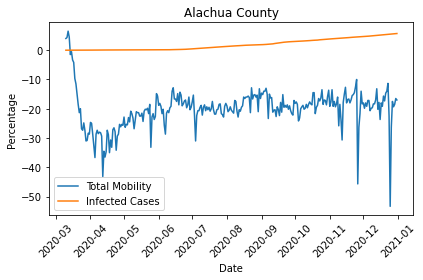

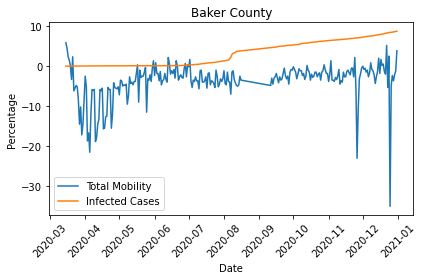

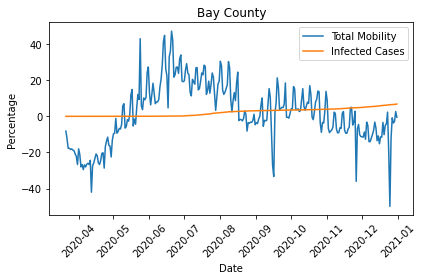

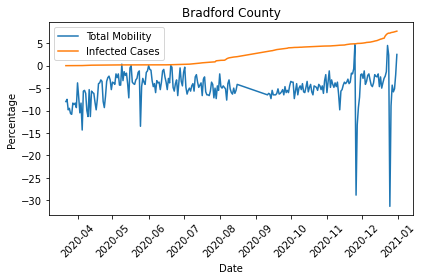

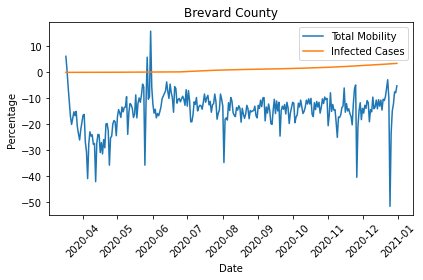

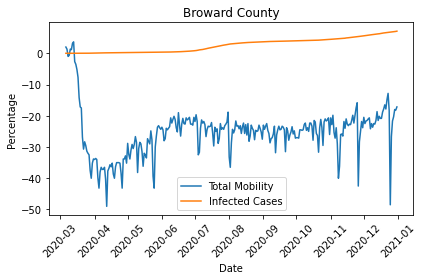

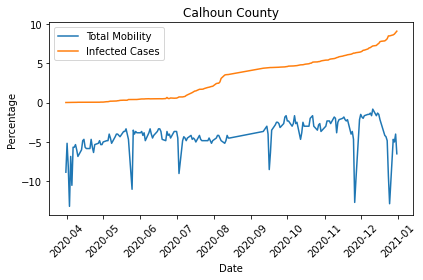

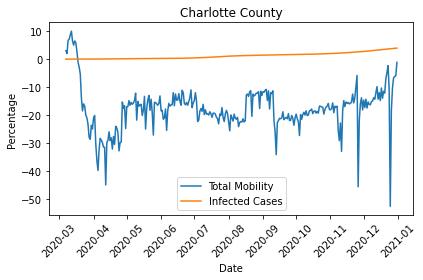

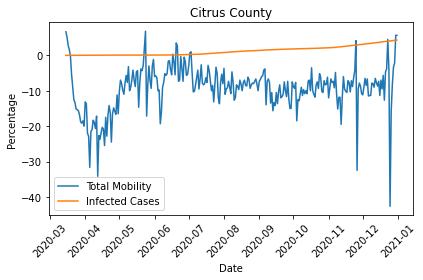

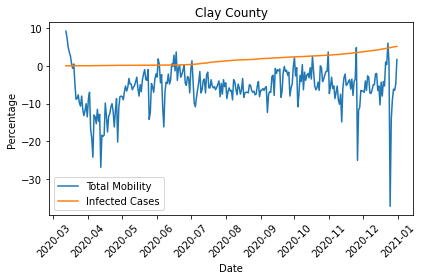

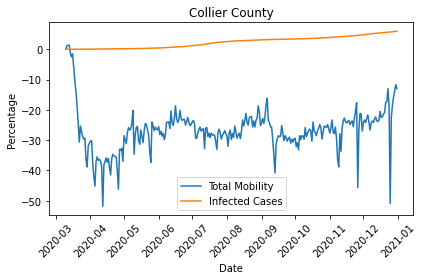

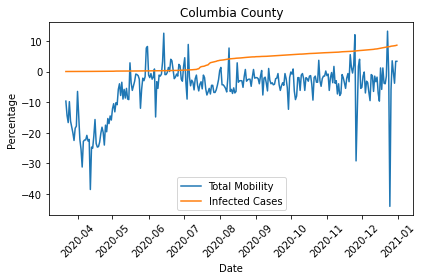

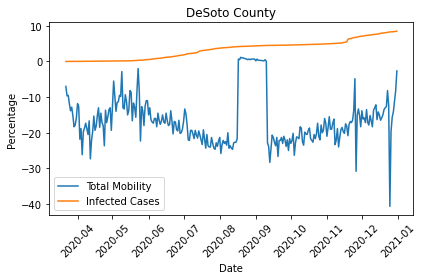

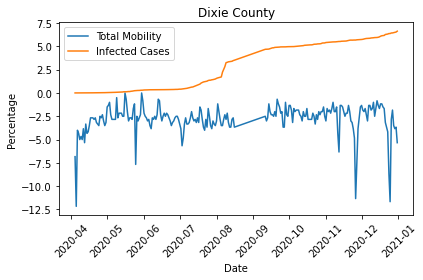

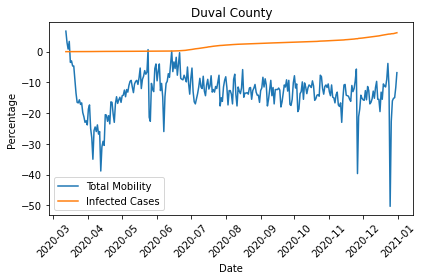

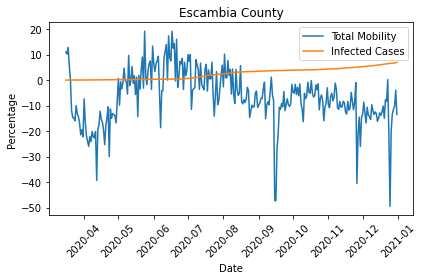

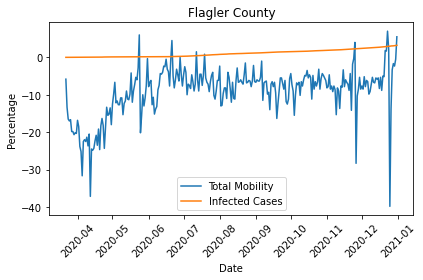

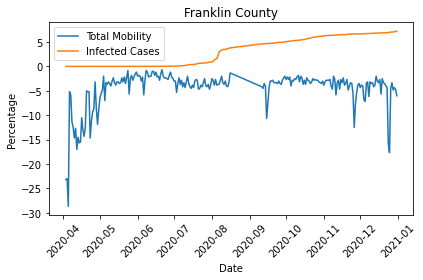

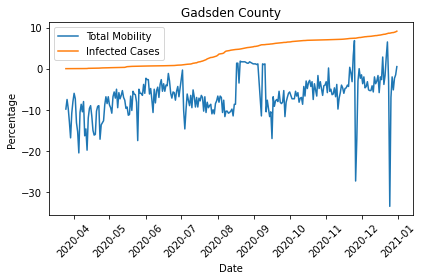

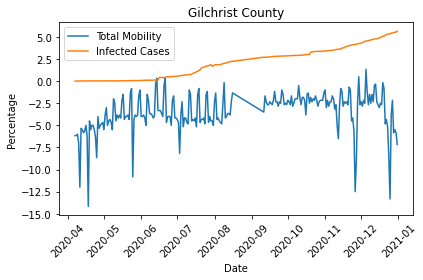

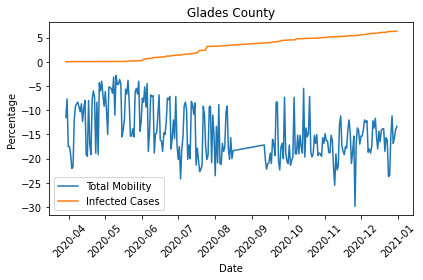

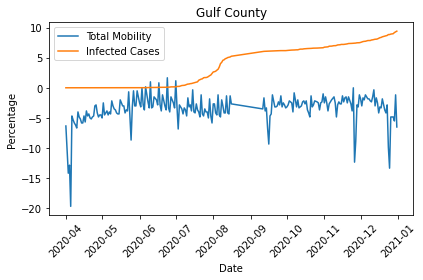

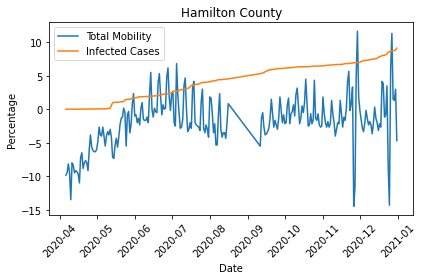

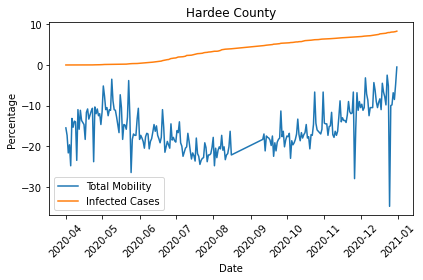

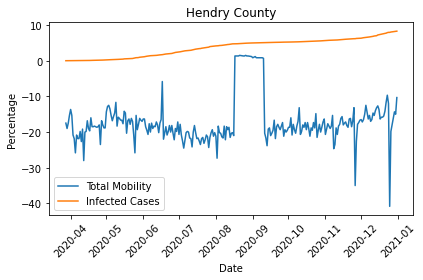

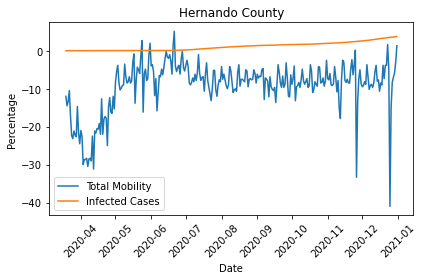

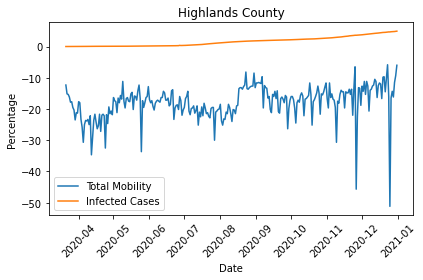

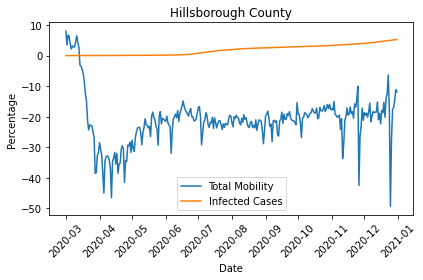

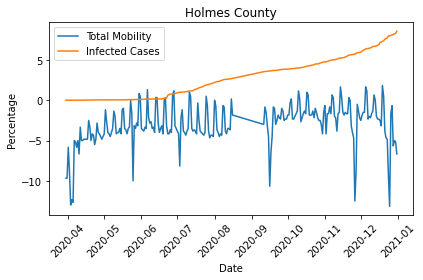

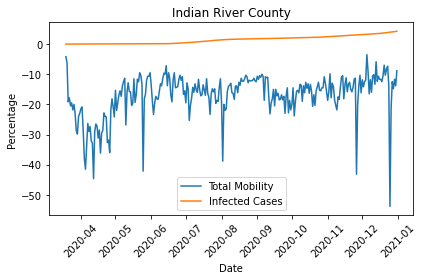

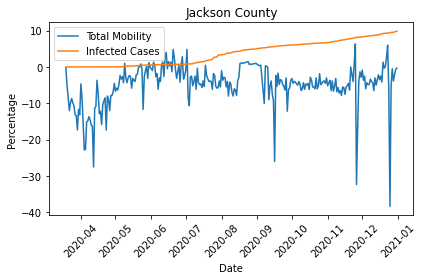

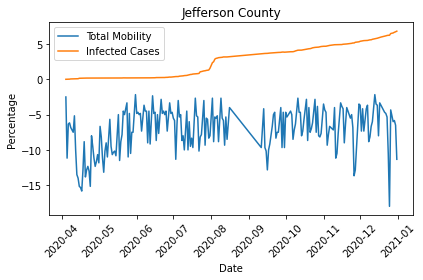

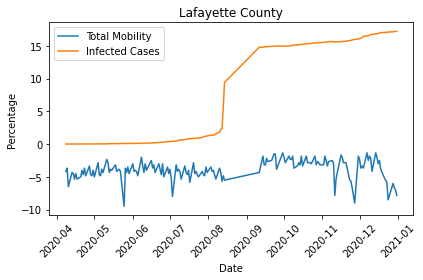

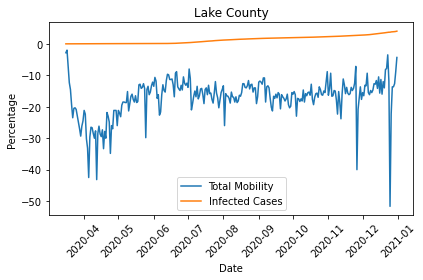

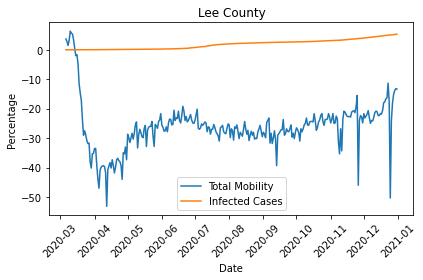

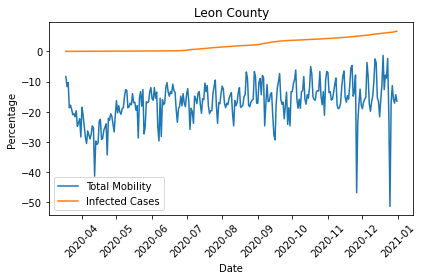

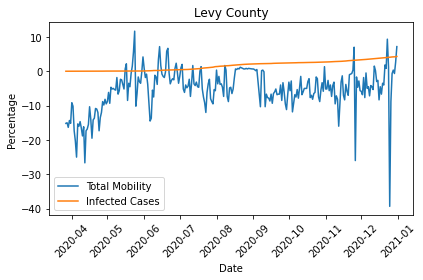

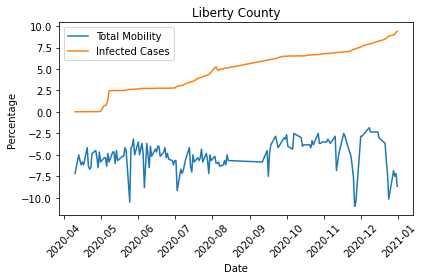

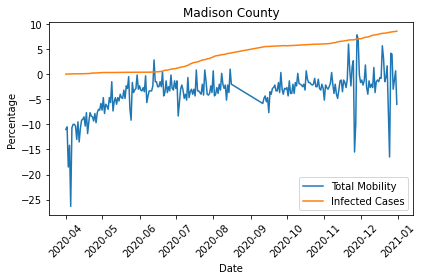

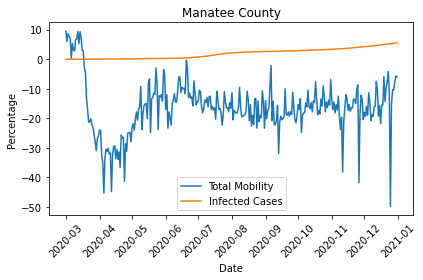

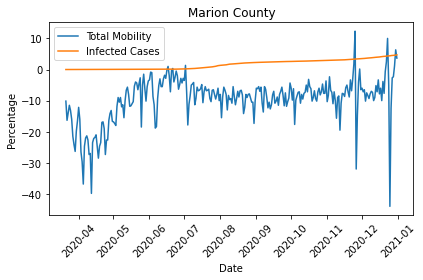

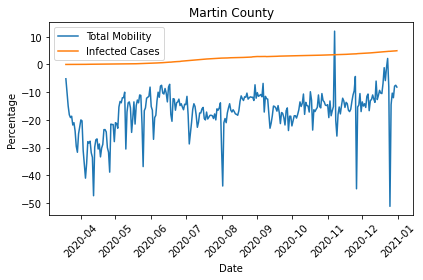

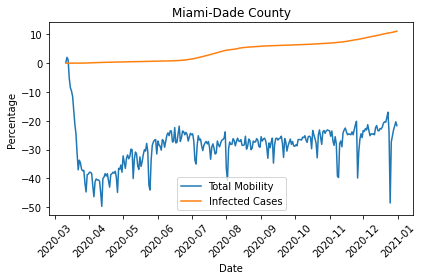

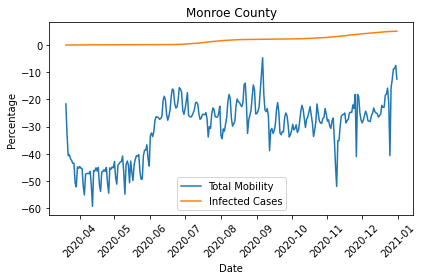

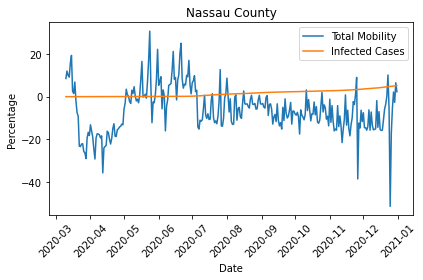

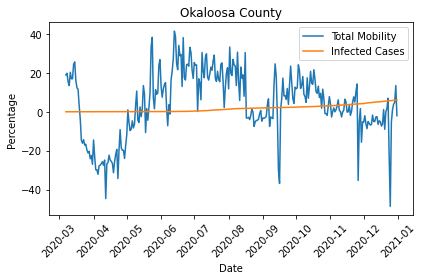

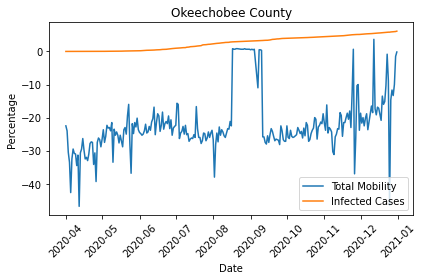

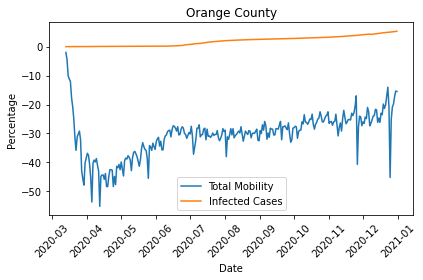

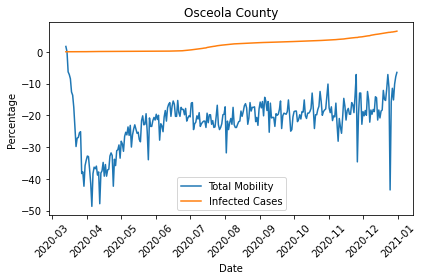

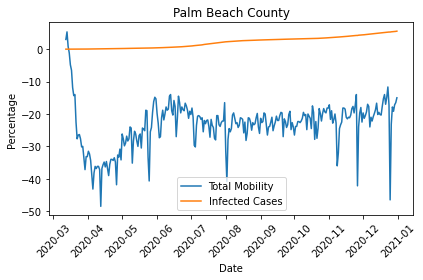

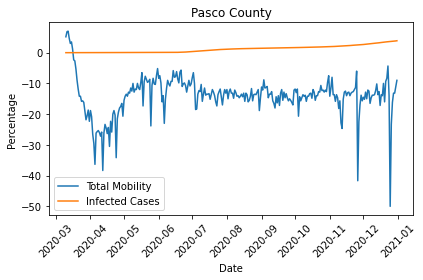

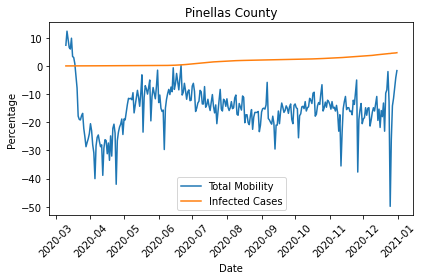

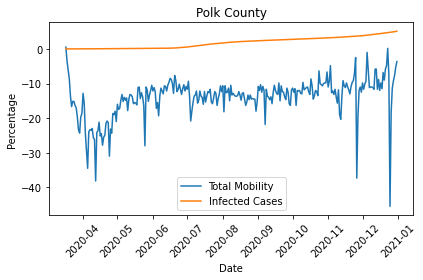

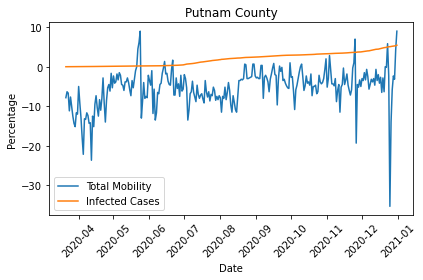

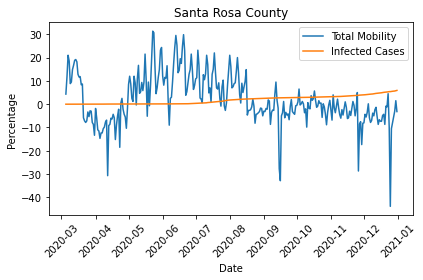

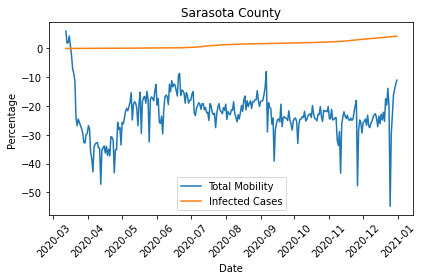

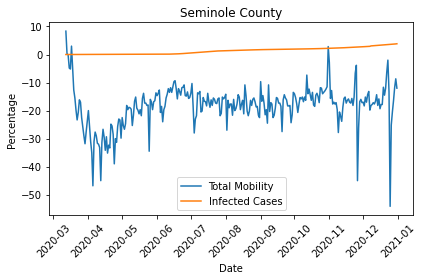

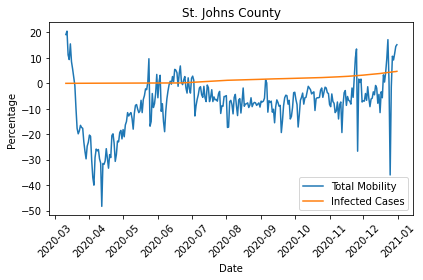

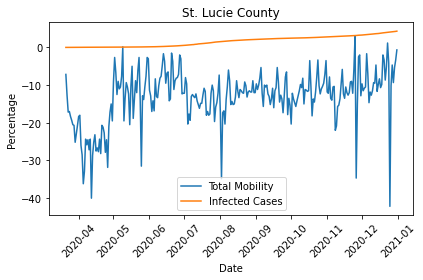

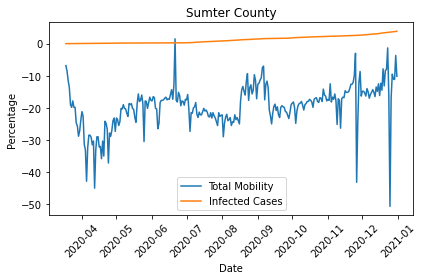

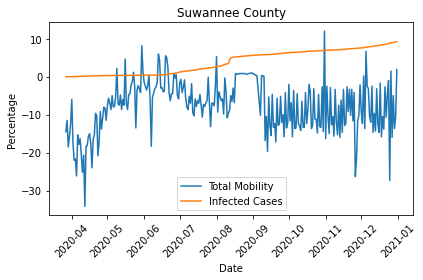

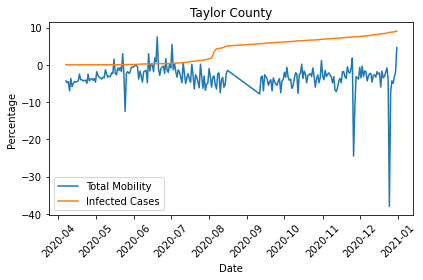

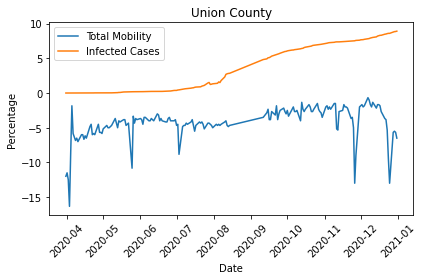

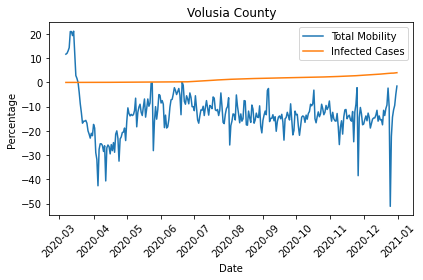

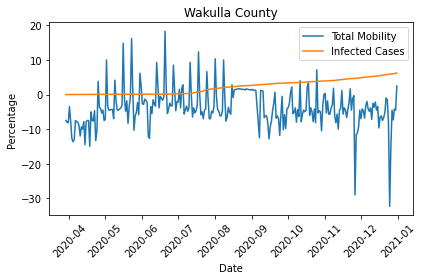

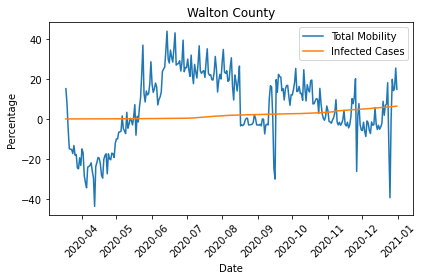

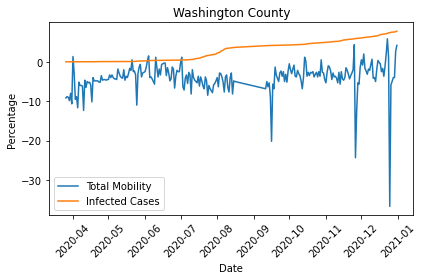

In [37]:
# group the data by county
grouped = df_mob_inf_fl_2020.groupby('county')

for name, group in grouped:
    plt.plot(group['date'], group['total_mobility'], label='Total Mobility')
    plt.plot(group['date'], group['cases_percent'], label='Infected Cases')
    plt.title(name)
    plt.legend()
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Percentage')
    plt.tight_layout()
    filename = os.path.join('Figure/2020/Percent_of_Infection', name + '.jpeg')
    plt.savefig(filename, dpi=400)
    plt.show()

In [38]:
df_mob_inf_fl_2020.head(10)

county       date  retail_and_recreation  grocery_and_pharmacy  \
0  Alachua County 2020-03-10                    5.0                   4.0   
1  Alachua County 2020-03-11                    6.0                   9.0   
2  Alachua County 2020-03-12                    5.0                  13.0   
3  Alachua County 2020-03-13                    3.0                  16.0   
4  Alachua County 2020-03-14                   -8.0                  14.0   
5  Alachua County 2020-03-15                  -12.0                   7.0   
6  Alachua County 2020-03-16                   -8.0                  11.0   
7  Alachua County 2020-03-17                  -13.0                   9.0   
8  Alachua County 2020-03-18                  -21.0                   3.0   
9  Alachua County 2020-03-19                  -25.0                   0.0   

   parks  transit_stations  workplace  residential  cases  deaths  \
0   12.0               3.0        0.0          0.0      1     0.0   
1   15.0              -3.0       -1.0          0.0      1     0.0   
2   21.0               0.0       -1.0          1.0      2     0.0   
3   13.0              -3.0       -4.0          2.0      3     0.0   
4  -11.0              -3.0       -3.0          2.0      3     0.0   
5   14.0              -8.0       -7.0          3.0      4     0.0   
6    3.0             -15.0      -19.0          8.0      4     0.0   
7    8.0             -16.0      -23.0         10.0      6     0.0   
8   -2.0             -23.0      -28.0         13.0      7     0.0   
9   -6.0             -21.0      -31.0         14.0     11     0.0   

   total_mobility  pop_2020  cases_percent  
0        4.000000    278684       0.000359  
1        4.333333    278684       0.000359  
2        6.500000    278684       0.000718  
3        4.500000    278684       0.001076  
4       -1.500000    278684       0.001076  
5       -0.500000    278684       0.001435  
6       -3.333333    278684       0.001435  
7       -4.166667    278684       0.002153  
8       -9.666667    278684       0.002512  
9      -11.500000    278684       0.003947

In [39]:
# Export into csv file
df_mob_inf_fl_2020.to_csv('Data\Pre_Processed\pre_processed_data.csv', index=False)